# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} = 
-\frac{\hbar^2}{2m\sigma^4}
 \frac{e^{-\frac{(x-\mu )^2}{2 \sigma ^2}} \left((x-\mu )^2-\sigma ^2\right)+ e^{-\frac{(x+\mu )^2}{2 \sigma ^2}} \left((x+\mu )^2-\sigma ^2\right)}{e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}}
$$

In questo eserizio è richiesto di campionare la densità di probabilità:
$$
|\Psi_T^{\sigma,\mu}(x)|^2 \propto |e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}|^2
$$

che rappresenta la funzione d'onda 1-dimensionale di una particella quantistica, per calcolare il valore di aspettazione dell'hamiltoniana:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Per farlo si è utilizzato l'algoritmo di Metropolis, similmente a quanto fatto nell'esercitazione 6 e 7, che permette di campionare una qualunque distribuzione di probabilità $f(x)$:

- data una configurazione iniziale (qui rappresentata dalla coordinata $x_{old}$), se ne genera una casuale $x_{new} = x_{old} + dx$ con $dx$ variabile casuale uniformemente distribuita tra $[-\delta, \delta]$;
- questa viene accettata con una probabilità $p = min[1, f(x_{new})/f(x_{old})]$, altrimenti si rimane su $x_{old}$.

In questo caso $f(x) = |\psi^{\mu,\sigma}(x)|^2$, con $\mu = 0.8$ e $\sigma=0.4$.

Nel grafico seguente è presente proprio il calcolo del valore di aspettazione dell'Hamiltoniana su questo stato in funzione del numero di blocchi utilizzati. Sono presenti tre curve relative a tre diversi valori di lunghezza dei blocchi.

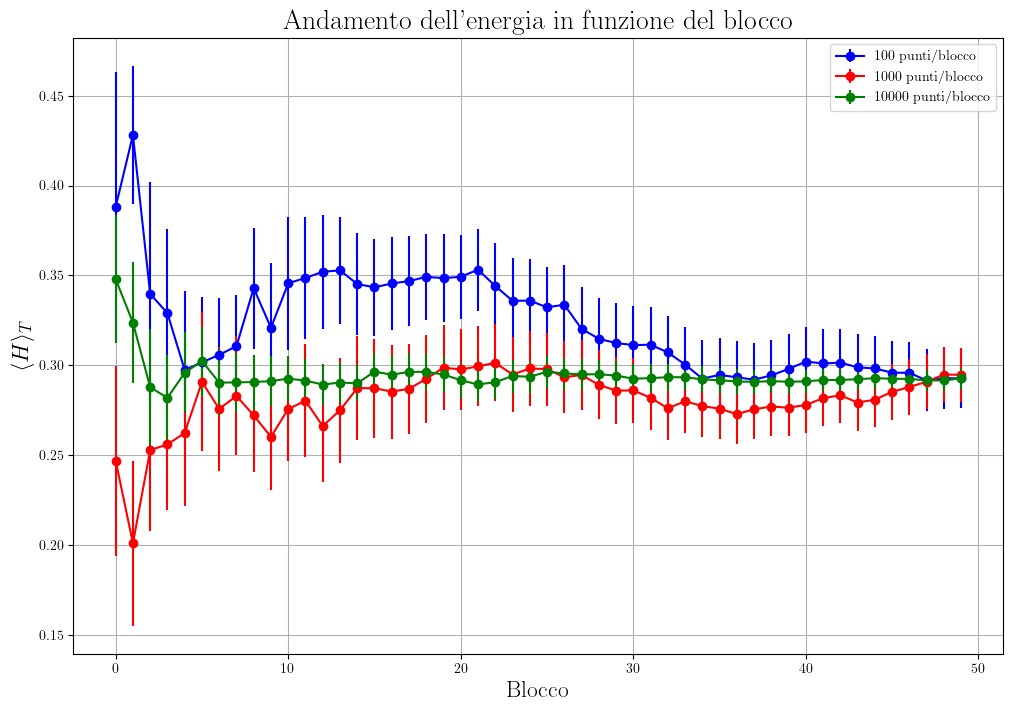

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Impostazioni per utilizzare LaTeX nei testi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def read_data(file_path):
    data = np.loadtxt(file_path, skiprows=1)  # Salta la prima riga
    return data[::2, 0], data[::2, 1]  # Restituisce la prima e la seconda colonna

# Legge i dati dai file
y1, yerr1 = read_data('esercizio_8.1/OUTPUT/mean1.dat')
y2, yerr2 = read_data('esercizio_8.1/OUTPUT/mean2.dat')
y3, yerr3 = read_data('esercizio_8.1/OUTPUT/mean3.dat')

# Genera il numero del punto
x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))

plt.figure(figsize=(12, 8))

# Plot dei dati con errori
plt.errorbar(x1, y1, yerr=yerr1, fmt='-o', label='100 punti/blocco', color='blue')
plt.errorbar(x2, y2, yerr=yerr2, fmt='-o', label='1000 punti/blocco', color='red')
plt.errorbar(x3, y3, yerr=yerr3, fmt='-o', label='10000 punti/blocco', color='green')

# Aggiungi etichette e titolo
plt.xlabel('Blocco', fontsize = 17)
plt.ylabel(r'$\langle H \rangle_T$', fontsize = 17)
plt.title('Andamento dell\'energia in funzione del blocco', fontsize = 20)
plt.grid()
plt.legend()

# Mostra il plot
plt.show()


Nei successivi grafici si può osservare l'istogramma relativo al campionamento del modulo quadro della funzione d'onda nel caso delle tre curve viste precedentemente. L'unica differenza tra questi tre garfici è il numero di punti utilizzato.

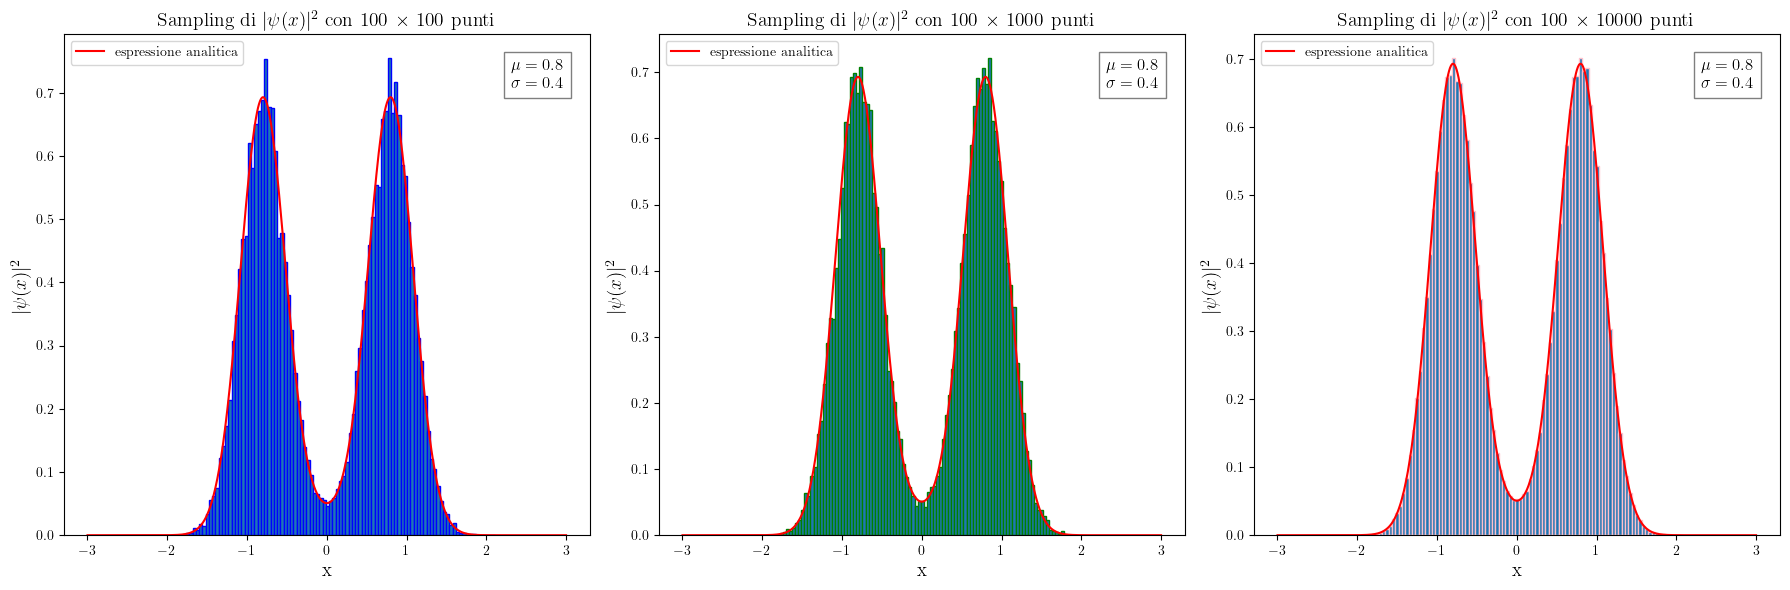

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione per leggere i dati dai file
def read_data(file_path):
    data = np.loadtxt(file_path)
    return data

# Legge i dati dai file
data1 = read_data('esercizio_8.1/OUTPUT/sampling1.dat')
data2 = read_data('esercizio_8.1/OUTPUT/sampling2.dat')
data3 = read_data('esercizio_8.1/OUTPUT/sampling3.dat')

# Crea una figura con tre subplot orizzontali
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Definisci la funzione gaussiana
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu)**2) / (2 * sigma**2)) + np.exp(-((x + mu)**2) / (2 * sigma**2))

# Genera valori x per la funzione
x = np.linspace(-3, 3, 1000)

# Normalizza la funzione gaussiana al quadrato
def normalized_gaussian_squared(x, mu, sigma):
    return gaussian(x, mu, sigma)**2 / np.trapz(gaussian(x, mu, sigma)**2, x)

# Istogramma del primo dataset
axs[0].hist(data1, bins=100, edgecolor='blue', density=True)
axs[0].set_title(r'Sampling di $|\psi(x)|^2$ con 100 $\times$ 100 punti', fontsize=14)
axs[0].set_xlabel('x', fontsize=14)
axs[0].set_ylabel(r'$|\psi(x)|^2$', fontsize=14)
axs[0].text(0.95, 0.95, r'$\mu = 0.8$' + '\n' + r'$\sigma = 0.4$', verticalalignment='top', horizontalalignment='right', transform=axs[0].transAxes, fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
axs[0].plot(x, normalized_gaussian_squared(x, 0.8, 0.4), label=r'espressione analitica', color='red')
axs[0].legend()
axs[0].legend(loc='upper left')

# Istogramma del secondo dataset
axs[1].hist(data2, bins=100, edgecolor='green', density=True)
axs[1].set_title(r'Sampling di $|\psi(x)|^2$ con 100 $\times$ 1000 punti', fontsize=14)
axs[1].set_xlabel('x', fontsize=14)
axs[1].set_ylabel(r'$|\psi(x)|^2$', fontsize=14)
axs[1].text(0.95, 0.95, r'$\mu = 0.8$' + '\n' + r'$\sigma = 0.4$', verticalalignment='top', horizontalalignment='right', transform=axs[1].transAxes, fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
axs[1].plot(x, normalized_gaussian_squared(x, 0.8, 0.4), label=r'espressione analitica', color='red')
axs[1].legend()
axs[1].legend(loc='upper left')

# Istogramma del terzo dataset
axs[2].hist(data3, bins=100, edgecolor='pink', density=True)
axs[2].set_title(r'Sampling di $|\psi(x)|^2$ con 100 $\times$ 10000 punti', fontsize=14)
axs[2].set_xlabel('x', fontsize=14)
axs[2].set_ylabel(r'$|\psi(x)|^2$', fontsize=14)
axs[2].text(0.95, 0.95, r'$\mu = 0.8$' + '\n' + r'$\sigma = 0.4$', verticalalignment='top', horizontalalignment='right', transform=axs[2].transAxes, fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
axs[2].plot(x, normalized_gaussian_squared(x, 0.8, 0.4), label=r'espressione analitica', color='red')
axs[2].legend()
axs[2].legend(loc='upper left')


# Aggiusta il layout
plt.tight_layout()

# Mostra i plot
plt.show()


### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

L'algoritmo del Simulated Annealing si basa sul fenomeno naturale del raffreddamento. Prendendo l'Hamiltoniana di cui vogliamo trovare il minimo, possiamo considerare la distribuzione $p(x) = e^{-\beta \bra{\psi^{\mu, \sigma}} H\ket{\psi^{\mu, \sigma}}}$. Per $\beta \rightarrow + \infty$, questa distribuzione si concentra intorno al minimo di $\bra{\psi^{\mu, \sigma}} H\ket{\psi^{\mu, \sigma}}$. Quindi, l'idea è di "raffreddare" il sistema (cioè far scendere la temperatura a $T \rightarrow 0$, equivalente a $\beta \rightarrow + \infty$) mentre si campiona p(x), in modo da trovarne il minimo.

Possiamo applicare questa tecnica per la ricerca dello stato fondamentale (ground state) di un'Hamiltoniana utilizzando metodi variazionali. In questo caso, lo spazio delle configurazioni possibili si ottiene variando i parametri $\mu$ e $\sigma$, che giocano il ruolo delle coordinate $x$ nel campionamento della funzione d'onda.

Nel codice, ho implementato il Simulated Annealing con tre diversi schemi di raffreddamento:
- lineare: $\beta = 10+i$
- quadratico: $\beta = (10+0.01i)^2$
- geometrico: $\beta_{new} = 1.005\beta_{old}$

dove $i$ indica l'i-esima iterazione del sistema.

Il codice parte da un valore iniziale di $\beta$ e lo incrementa ad ogni step. Durante ogni iterazione, si campiona la distribuzione di Boltzmann per trovare la configurazione successiva, calcolando il valore dell'Hamiltoniana con incertezza statistica utilizzando 100 blocchi da 5000 passi ciascuno. Questa procedura continua finché diventa evidente che l'energia non può più diminuire significativamente ma oscilla attorno a un valore, con un'incertezza che dipende dal numero di misure effettuate per il calcolo dell'Hamiltoniana. Nello spazio dei parametri, ciò si manifesta con $(\mu,\sigma)$ che iniziano a oscillare attorno a un punto, formando una "nuvoletta".

La condizione di stop è determinata prendendo le medie di 10 misurazioni consecutive e confrontandole con le medie delle 10 misurazioni precedenti. Una misura si considera solo quando il passo proposto viene accettato (ovvero quando $\mu$ e $\sigma$ cambiano). Se la differenza tra queste medie è inferiore a tre volte l'incertezza sull'ultima misurazione dell'Hamiltoniana (per convenzione, simile tra tutte le misure), si incrementa un contatore. Quando questo accade per 10 volte consecutive (valore empirico determinato dopo diverse simulazioni), il processo termina.

Nei grafici seguenti, si possono vedere l'andamento dell'energia in funzione dell'inverso della temperatura e l'esplorazione del sistema nello spazio dei parametri $(\mu, \sigma)$.

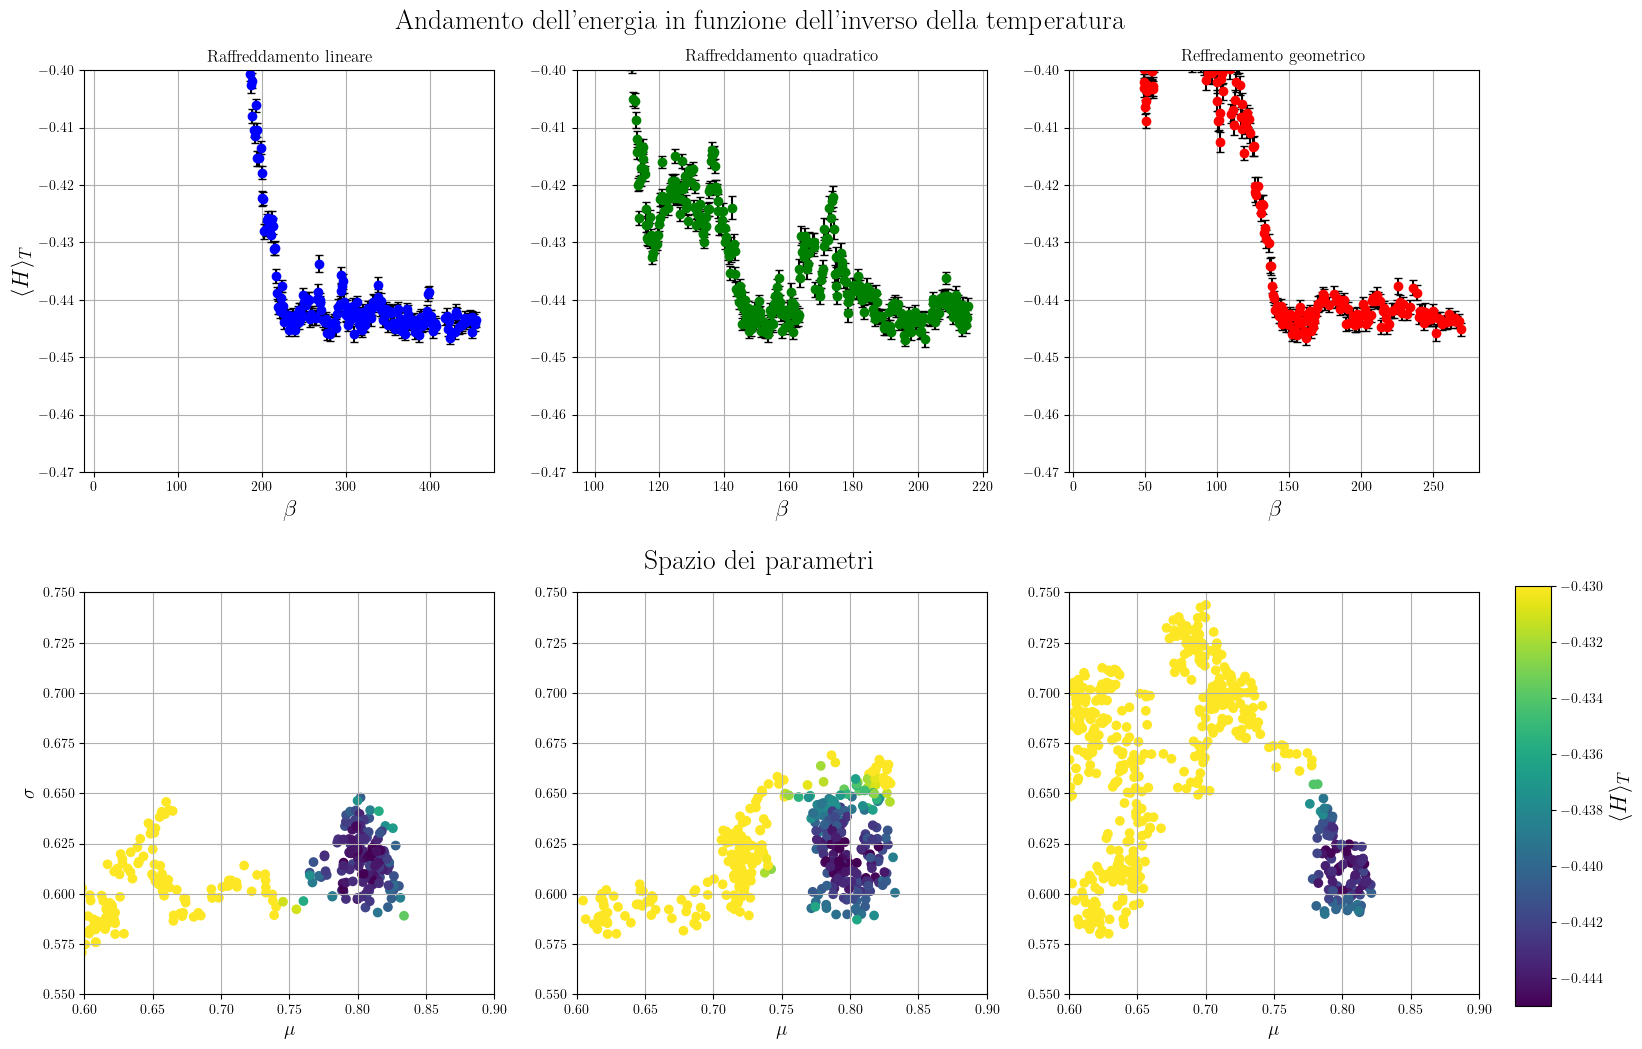

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Funzione per leggere specifiche colonne da un file, prendendo ogni quinto punto dati, saltando la prima riga
def read_data(file_path):
    data = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1)
    return data.values

# Funzione per creare un array di colori basato sui valori y
def create_color_array(y_values, cmap_name='viridis'):
    cmap = plt.get_cmap(cmap_name)
    norm = plt.Normalize(-0.445, -0.43)
    color_array = cmap(norm(y_values))
    return color_array, norm, cmap

# Leggere i dati dai file
data_lin = read_data('esercizio_8.2/OUTPUT_LIN/data.dat')
data_qdr = read_data('esercizio_8.2/OUTPUT_QDR/data.dat')
data_geo = read_data('esercizio_8.2/OUTPUT_GEO/data.dat')

# Selezionare ogni quinto punto per il plot
data_lin_red = data_lin[::1]
data_qdr_red = data_qdr[::1]
data_geo_red = data_geo[::1]

# Creare i grafici affiancati
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Aggiustare il layout per aggiungere più spazio tra le righe
plt.subplots_adjust(hspace=0.3)

# Aggiungere i titoli alle righe
fig.text(0.5, 0.92, 'Andamento dell\'energia in funzione dell\'inverso della temperatura', ha='center', va='center', fontsize=20)
fig.text(0.5, 0.47, 'Spazio dei parametri', ha='center', va='center', fontsize=20)

# Plot dati con barre di errore e colori diversi
axs[0, 0].errorbar(data_lin_red[:, 0], data_lin_red[:, 3], yerr=data_lin_red[:, 4], fmt='o', label='Linear', color='blue', ecolor='black', capsize=3)
axs[0, 0].set_title('Raffreddamento lineare')
axs[0, 0].set_xlabel(r'$\beta$', fontsize=17)
axs[0, 0].set_ylim(-0.47, -0.40)
axs[0, 0].set_ylabel(r'$\langle H \rangle_T$', fontsize=17)
axs[0, 0].grid(True)

axs[0, 1].errorbar(data_qdr_red[:, 0], data_qdr_red[:, 3], yerr=data_qdr_red[:, 4], fmt='o', label='Quadratic', color='green', ecolor='black', capsize=3)
axs[0, 1].set_title('Raffreddamento quadratico')
axs[0, 1].set_xlabel(r'$\beta$', fontsize=17)
axs[0, 1].set_ylim(-0.47, -0.40)
axs[0, 1].grid(True)

axs[0, 2].errorbar(data_geo_red[:, 0], data_geo_red[:, 3], yerr=data_geo_red[:, 4], fmt='o', label='Geometric', color='red', ecolor='black', capsize=3)
axs[0, 2].set_title('Reffredamento geometrico')
axs[0, 2].set_xlabel(r'$\beta$', fontsize=17)
axs[0, 2].set_ylim(-0.47, -0.40)
axs[0, 2].grid(True)

# Creare array di colori
color_array_lin, norm_lin, cmap_lin = create_color_array(data_lin_red[:, 3])
color_array_qdr, norm_qdr, cmap_qdr = create_color_array(data_qdr_red[:, 3])
color_array_geo, norm_geo, cmap_geo = create_color_array(data_geo_red[:, 3])

# Plot scatter dei valori mu e sigma con colori variabili basati sulle energie
sc_lin = axs[1, 0].scatter(np.abs(data_lin_red[:, 1]), np.abs(data_lin_red[:, 2]), color=color_array_lin)
axs[1, 0].set_xlabel('$\mu$', fontsize=14)
axs[1, 0].set_ylabel('$\sigma$', fontsize=14)
axs[1, 0].set_xlim(0.6, 0.9)
axs[1, 0].set_ylim(0.55, 0.75)
axs[1, 0].grid(True)

sc_qdr = axs[1, 1].scatter(np.abs(data_qdr_red[:, 1]), np.abs(data_qdr_red[:, 2]), color=color_array_qdr)
axs[1, 1].set_xlabel('$\mu$', fontsize=14)
axs[1, 1].set_ylabel('', fontsize=14)
axs[1, 1].set_xlim(0.6, 0.9)
axs[1, 1].set_ylim(0.55, 0.75)
axs[1, 1].grid(True)

sc_geo = axs[1, 2].scatter(np.abs(data_geo_red[:, 1]), np.abs(data_geo_red[:, 2]), color=color_array_geo)
axs[1, 2].set_xlabel('$\mu$', fontsize=14)
axs[1, 2].set_ylabel('', fontsize=14)
axs[1, 2].set_xlim(0.6, 0.9)
axs[1, 2].set_ylim(0.55, 0.75)
axs[1, 2].grid(True)

# Aggiungere la barra del colore per lo scatter plot
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.35])  # [left, bottom, width, height]
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm_lin, cmap=cmap_lin), cax=cbar_ax)
cbar.set_label(r'$\langle H \rangle_T$', fontsize=17)

# Mostra il plot
plt.show()


A fine simulazione, preso il valore di $\beta$ si è campionato $p(x) = e^{-\beta E^{\mu,\sigma}}/Z$ a temperatura fissa per provare a riprodurre la "nuvoletta" prima citata, ed estrarre da questa il valore medio e la deviazione standard che in qualche modo forniscono una stima dei parametri e dell'incertezza associata.

Nei grafici seguenti sono presenti gli istogrammi dei due parametri $\mu$ e $\sigma$ per i tre raffreddamenti.

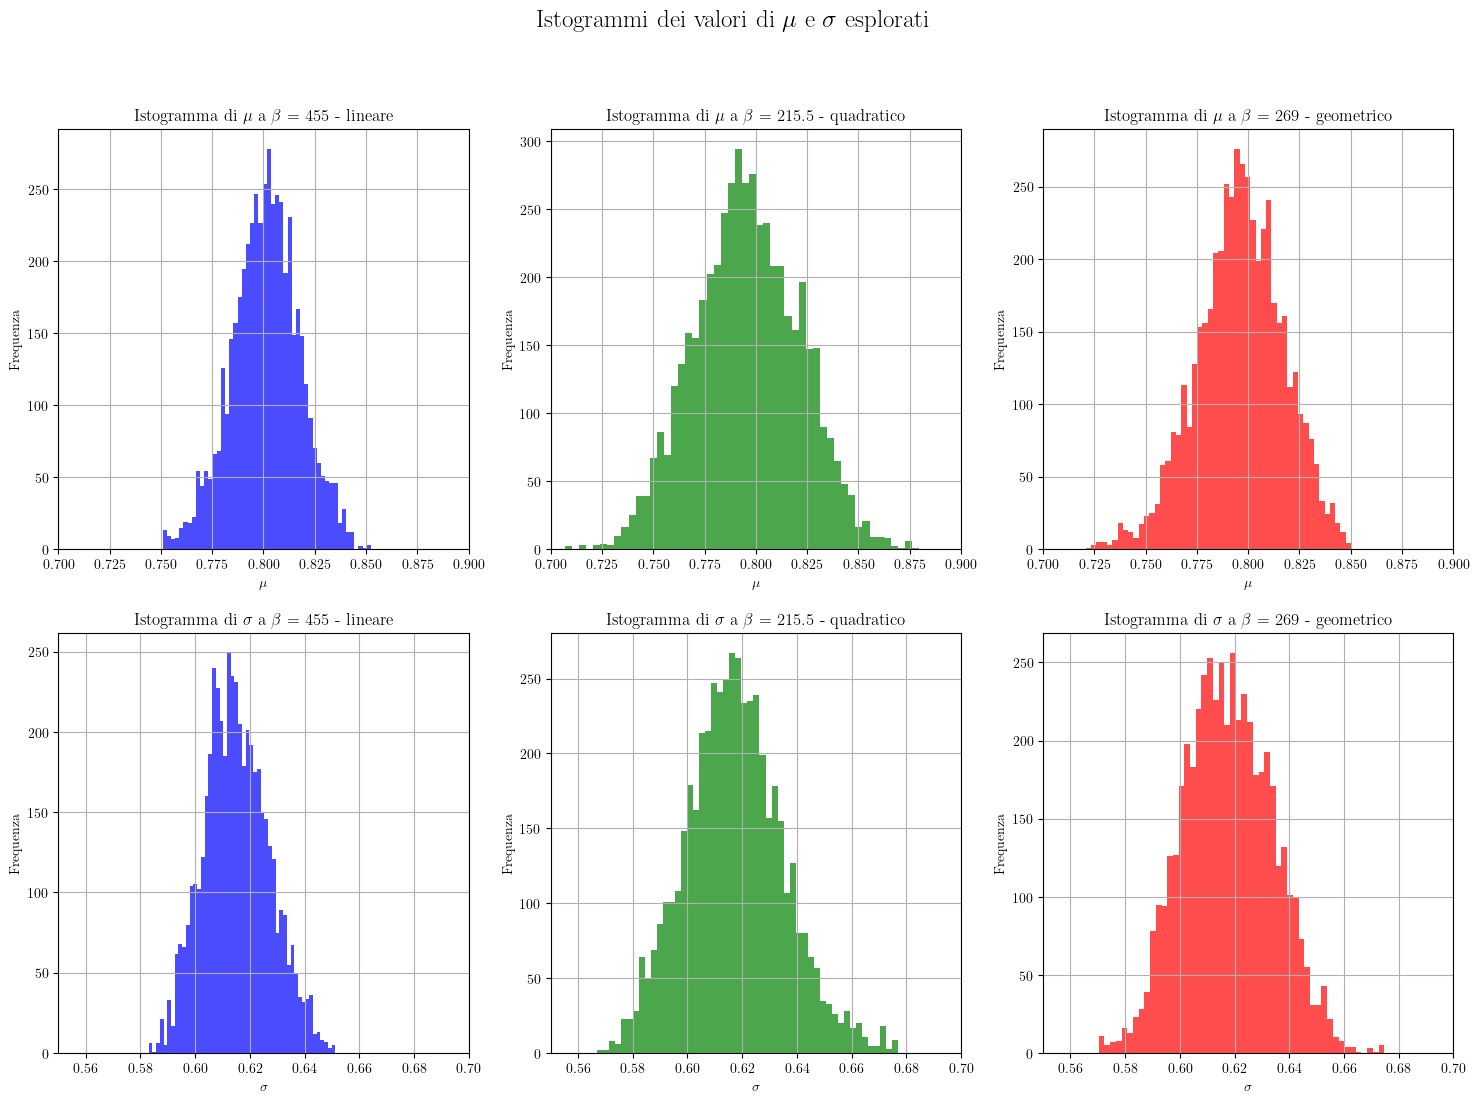

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Funzione per leggere le colonne richieste da un file
def read_data(file_path):
    data = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1)
    return data

# Leggi i dati dai tre file
data_lin = read_data('esercizio_8.2/OUTPUT_LIN/params.dat')
data_qdr = read_data('esercizio_8.2/OUTPUT_QDR/params.dat')
data_geo = read_data('esercizio_8.2/OUTPUT_GEO/params.dat')

# Prendi i valori assoluti delle colonne richieste
data_lin.iloc[:, 1] = data_lin.iloc[:, 1].abs()
data_lin.iloc[:, 2] = data_lin.iloc[:, 2].abs()

data_qdr.iloc[:, 1] = data_qdr.iloc[:, 1].abs()
data_qdr.iloc[:, 2] = data_qdr.iloc[:, 2].abs()

data_geo.iloc[:, 1] = data_geo.iloc[:, 1].abs()
data_geo.iloc[:, 2] = data_geo.iloc[:, 2].abs()

# Creazione dei grafici affiancati per gli istogrammi
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Istogramma della seconda colonna con range limitato a 0.7-0.9
axs[0, 0].hist(data_lin[(data_lin.iloc[:, 1] >= 0.7) & (data_lin.iloc[:, 1] <= 0.9)].iloc[:, 1], bins=50, color='blue', alpha=0.7)
axs[0, 0].set_title(r'Istogramma di $\mu$ a $\beta$ = 455 - lineare')
axs[0, 0].set_xlabel('$\mu$')
axs[0, 0].set_ylabel('Frequenza')
axs[0, 0].set_xlim(0.7, 0.9)
axs[0, 0].grid(True)

axs[0, 1].hist(data_qdr[(data_qdr.iloc[:, 1] >= 0.7) & (data_qdr.iloc[:, 1] <= 0.9)].iloc[:, 1], bins=50, color='green', alpha=0.7)
axs[0, 1].set_title(r'Istogramma di $\mu$ a $\beta$ = 215.5 - quadratico')
axs[0, 1].set_xlabel('$\mu$')
axs[0, 1].set_ylabel('Frequenza')
axs[0, 1].set_xlim(0.7, 0.9)
axs[0, 1].grid(True)

axs[0, 2].hist(data_geo[(data_geo.iloc[:, 1] >= 0.7) & (data_geo.iloc[:, 1] <= 0.9)].iloc[:, 1], bins=50, color='red', alpha=0.7)
axs[0, 2].set_title(r'Istogramma di $\mu$ a $\beta$ = 269 - geometrico')
axs[0, 2].set_xlabel('$\mu$')
axs[0, 2].set_ylabel('Frequenza')
axs[0, 2].set_xlim(0.7, 0.9)
axs[0, 2].grid(True)

# Istogramma della terza colonna con range limitato a 0.55-0.7
axs[1, 0].hist(data_lin[(data_lin.iloc[:, 2] >= 0.55) & (data_lin.iloc[:, 2] <= 0.7)].iloc[:, 2], bins=50, color='blue', alpha=0.7)
axs[1, 0].set_title(r'Istogramma di $\sigma$ a $\beta$ = 455 - lineare')
axs[1, 0].set_xlabel('$\sigma$')
axs[1, 0].set_ylabel('Frequenza')
axs[1, 0].set_xlim(0.55, 0.7)
axs[1, 0].grid(True)

axs[1, 1].hist(data_qdr[(data_qdr.iloc[:, 2] >= 0.55) & (data_qdr.iloc[:, 2] <= 0.7)].iloc[:, 2], bins=50, color='green', alpha=0.7)
axs[1, 1].set_title(r'Istogramma di $\sigma$ a $\beta$ = 215.5 - quadratico')
axs[1, 1].set_xlabel('$\sigma$')
axs[1, 1].set_ylabel('Frequenza')
axs[1, 1].set_xlim(0.55, 0.7)
axs[1, 1].grid(True)

axs[1, 2].hist(data_geo[(data_geo.iloc[:, 2] >= 0.55) & (data_geo.iloc[:, 2] <= 0.7)].iloc[:, 2], bins=50, color='red', alpha=0.7)
axs[1, 2].set_title(r'Istogramma di $\sigma$ a $\beta$ = 269 - geometrico')
axs[1, 2].set_xlabel('$\sigma$')
axs[1, 2].set_ylabel('Frequenza')
axs[1, 2].set_xlim(0.55, 0.7)
axs[1, 2].grid(True)

# Titolo principale
fig.suptitle(r'Istogrammi dei valori di $\mu$ e $\sigma$ esplorati', fontsize=18)

# Calcola la media e la deviazione standard
mean_lin_mu = data_lin.iloc[:, 1].mean()
std_lin_mu = data_lin.iloc[:, 1].std()

mean_lin_sigma = data_lin.iloc[:, 2].mean()
std_lin_sigma = data_lin.iloc[:, 2].std()

mean_qdr_mu = data_qdr.iloc[:, 1].mean()
std_qdr_mu = data_qdr.iloc[:, 1].std()

mean_qdr_sigma = data_qdr.iloc[:, 2].mean()
std_qdr_sigma = data_qdr.iloc[:, 2].std()

mean_geo_mu = data_geo.iloc[:, 1].mean()
std_geo_mu = data_geo.iloc[:, 1].std()

mean_geo_sigma = data_geo.iloc[:, 2].mean()
std_geo_sigma = data_geo.iloc[:, 2].std()

# Abilita il pan/zoom indipendente per ciascun asse
#plt.tight_layout()
#plt.subplots_adjust(top=0.90)  # Regola la posizione del titolo principale
plt.show()


I valori medi e le deviazioni standard dei parametri sono:

In [5]:
# Stampa dei risultati finali con un numero specifico di cifre significative
print(f'-raffreddamento lineare:      mu = {mean_lin_mu:.2f} ± {std_lin_mu:.2f}   sigma = {mean_lin_sigma:.2f} ± {std_lin_sigma:.2f}')
print(f'-raffreddamento quadratico:   mu = {mean_qdr_mu:.2f} ± {std_qdr_mu:.2f}   sigma = {mean_qdr_sigma:.2f} ± {std_qdr_sigma:.2f}')
print(f'-raffreddamento geometrico:   mu = {mean_geo_mu:.2f} ± {std_geo_mu:.2f}   sigma = {mean_geo_sigma:.2f} ± {std_geo_sigma:.2f}')


-raffreddamento lineare:      mu = 0.80 ± 0.02   sigma = 0.62 ± 0.01
-raffreddamento quadratico:   mu = 0.80 ± 0.03   sigma = 0.62 ± 0.02
-raffreddamento geometrico:   mu = 0.80 ± 0.02   sigma = 0.62 ± 0.02


Si noti che queste sono le deviazioni standard, non quelle sulle medie

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

Da questi valori si può calcolare l'energia, che nel grafico seguente viene presentata in funzione del blocco:

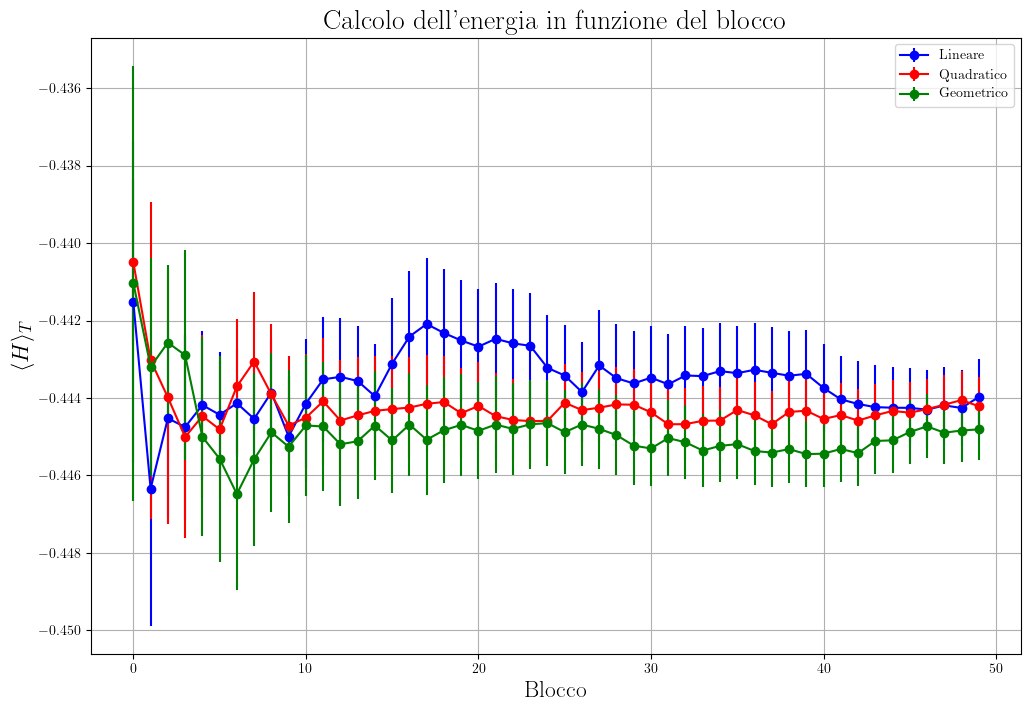

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Impostazioni per utilizzare LaTeX nei testi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def read_data(file_path):
    data = np.loadtxt(file_path, skiprows=1)  # Salta la prima riga
    return data[::2, 0], data[::2, 1]  # Restituisce la prima e la seconda colonna

# Legge i dati dai file
y1, yerr1 = read_data('esercizio_8.2/OUTPUT_LIN/block_mean.dat')
y2, yerr2 = read_data('esercizio_8.2/OUTPUT_QDR/block_mean.dat')
y3, yerr3 = read_data('esercizio_8.2/OUTPUT_GEO/block_mean.dat')

# Genera il numero del punto
x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))

plt.figure(figsize=(12, 8))

# Plot dei dati con errori
plt.errorbar(x1, y1, yerr=yerr1, fmt='-o', label='Lineare', color='blue')
plt.errorbar(x2, y2, yerr=yerr2, fmt='-o', label='Quadratico', color='red')
plt.errorbar(x3, y3, yerr=yerr3, fmt='-o', label='Geometrico', color='green')

# Aggiungi etichette e titolo
plt.xlabel('Blocco', fontsize = 17)
plt.ylabel(r'$\langle H \rangle_T$', fontsize = 17)
plt.title('Calcolo dell\'energia in funzione del blocco', fontsize = 20)
plt.grid()
plt.legend()

# Mostra il plot
plt.show()


Infine, si può osservare l'effettiva funzione d'onda: in rosso è presente il reale ground-state, mentre in blu la funzione d'onda considerata calcolata con i parametri $\mu$ e $\sigma$ trovati precedentemente; in grigio invece l'istogramma relativo al campionamento effettuato per il calcolo dell'energia.

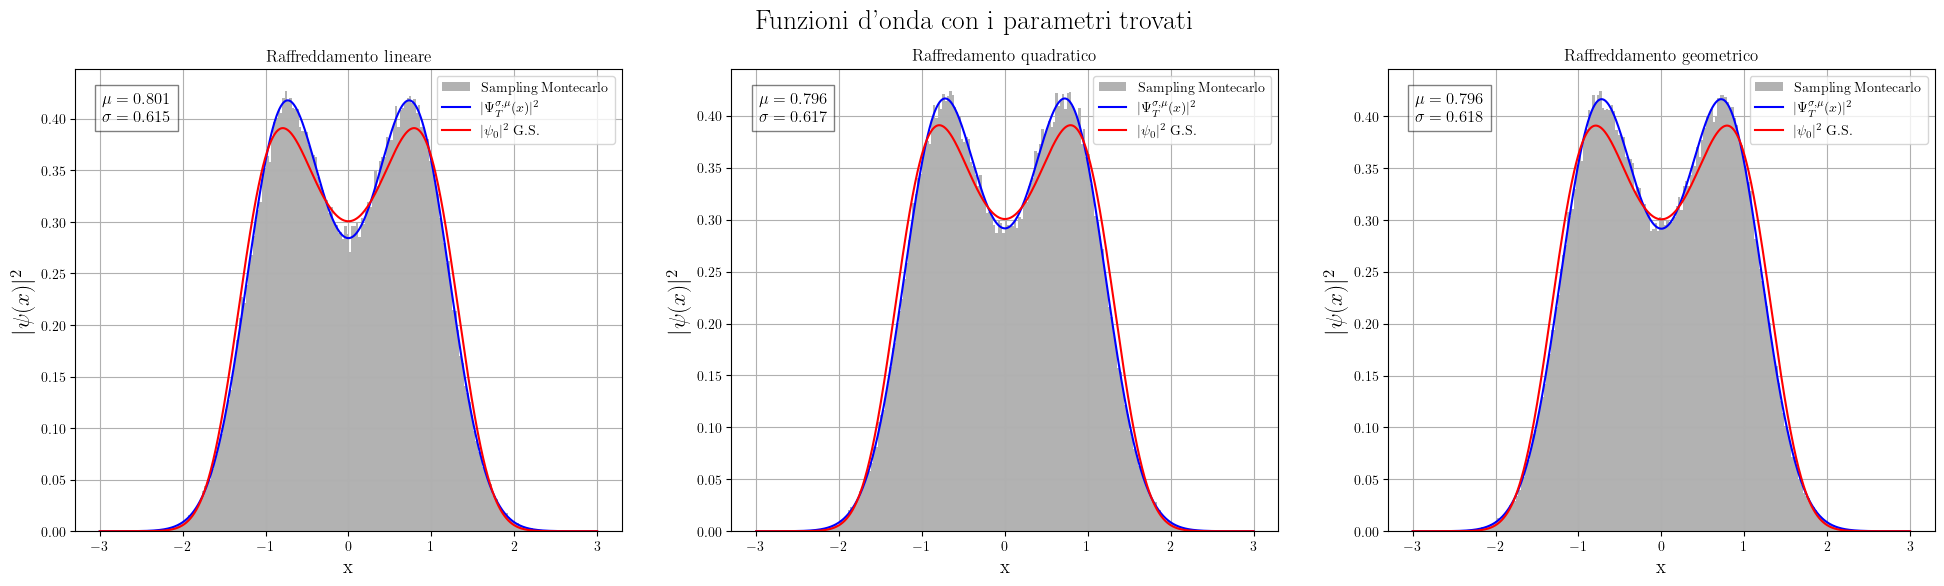

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Funzione per leggere i dati dai file
def read_sampling_data(file_path):
    data = pd.read_csv(file_path, sep='\s+', header=None)
    return data[0].values

# Funzione per creare la curva \Psi_T^{\sigma,\mu}(x)
def psi_T(x, mu, sigma):
    return ((np.exp(-(x-mu)**2 / (2*sigma**2)) + np.exp(-(x+mu)**2 / (2*sigma**2))))**2

# Leggere i dati dai file
data_lin = read_sampling_data('esercizio_8.2/OUTPUT_LIN/sampling.dat')
data_qdr = read_sampling_data('esercizio_8.2/OUTPUT_QDR/sampling.dat')
data_geo = read_sampling_data('esercizio_8.2/OUTPUT_GEO/sampling.dat')

# Definire l'intervallo x per le curve
x = np.linspace(-3, 3, 1000)

# Funzione per creare e plottare gli istogrammi e le curve
def plot_hist_and_curves(ax, data, mu, sigma, title):
    # Istogramma normalizzato
    ax.hist(data, bins=200, density=True, alpha=0.6, color='gray', label='Sampling Montecarlo')
    
    # Curva Psi_T^{\sigma,\mu}(x)
    psi_values = psi_T(x, mu, sigma)
    psi_values /= np.trapz(psi_values, x)  # Normalizzazione
    ax.plot(x, psi_values, label=r'$|\Psi_T^{\sigma,\mu}(x)|^2$', color='blue')
    
    # Calcolare e plottare la funzione d'onda del ground state \psi[0]^2
    # Utilizzando una funzione placeholder per esempio, sostituire con il calcolo reale
    psi_0_squared = psi[0]**2
    #psi_0_squared /= np.trapz(psi_0_squared, x)  # Normalizzazione
    ax.plot(x, psi_0_squared, label=r'$|\psi_0|^2$ G.S.', color='red')
    
    ax.set_title(title)
    ax.set_xlabel('x', fontsize = 14)
    ax.set_ylabel(r'$|\psi(x)|^2$', fontsize = 17)
    ax.legend()
    ax.grid(True)
    
    # Aggiungi il box con mu e sigma in alto a sinistra
    ax.text(0.05, 0.95, r'$\mu = {:.3f}$'.format(mu) + '\n' + r'$\sigma = {:.3f}$'.format(sigma), verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

# Creare subplot per i tre metodi
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plottare per ogni metodo
plot_hist_and_curves(axs[0], data_lin, mean_lin_mu, mean_lin_sigma, 'Raffreddamento lineare')
plot_hist_and_curves(axs[1], data_qdr, mean_qdr_mu, mean_qdr_sigma, 'Raffredamento quadratico')
plot_hist_and_curves(axs[2], data_geo, mean_geo_mu, mean_geo_sigma, 'Raffreddamento geometrico')

fig.suptitle('Funzioni d\'onda con i parametri trovati', fontsize=20)

plt.show()
